<a href="https://colab.research.google.com/github/ninja03jod/fastag_fraud_detection/blob/main/Fastag_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Fastag Fraud Detection:***

##### ***Life Cycle:***

- Understanding the Problem Statement..
- Data Collection..
- Exploratory Data Analysis..
- Data Preprocessing..
- Model Training..
- Choose best model..

***1) problem Statement:***
- Developing the accurate and efficient for Fastag fraud...

###***2) Data Collection:***
- DataSet Source: https://www.kaggle.com/datasets/thegoanpanda/fastag-fraud-detection-datesets-fictitious
- This Data Contains 5000 rows and 13 columns.

### ***Importing the data Required Libraries:***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import sklearn
print(sklearn.__version__)

1.4.2


In [ ]:
!pip install --upgrade scikit-learn==1.4.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 42.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install --upgrade imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 1.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
df = pd.read_csv("/content/FastagFraudDetection.csv",parse_dates=['Timestamp'])
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,2023-01-06 11:20:00,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,2023-01-07 14:55:00,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,2023-01-08 18:25:00,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,2023-01-09 02:05:00,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,2023-01-10 06:35:00,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,2023-01-01 22:18:00,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,2023-01-17 13:43:00,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2023-02-05 05:08:00,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2023-02-20 20:34:00,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


In [ ]:
# information:
def Info(df):

  # Total Records:
  print(f"Total Records are:{df.shape}\n")
  print(f"The columns are:\n{df.columns}\n")
  print(f"Total columns are:{df.shape[1]}\n")
  print("*"*170)

  # lets see the info and null values:

  print("Info:\n")
  print(f"{df.info()}\n")
  print(f"Null Values:\n{df.isnull().sum()}\n")
  print("*"*170)

  # lets see the data is in proportion or not:
  print(f"Output data is in proportion or not:\n{df.Fraud_indicator.value_counts(normalize=True)*100}\n")

Info(df)

Total Records are:(5000, 13)

The columns are:
Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

Total columns are:13

**************************************************************************************************************************************************************************
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Transaction_ID         5000 non-null   int64         
 1   Timestamp              5000 non-null   datetime64[ns]
 2   Vehicle_Type           5000 non-null   object        
 3   FastagID               4451 non-null   object        
 4   Toll

In [ ]:
# lets know the data by pandas profiling:
!pip install -q ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.9 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade typing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26304 sha256=53a25f3f65c6e14aeea7f18ca52b31868197a3cd1ba3e921f6d4f5be11fbc851
  Stored in directory: /root/.cache/pip/wheels/7c/d0/9e/1f26ebb66d9e1732e4098bc5a6c2d91f6c9a529838f0284890
Successfully built typing


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
report = ProfileReport(df)
report.to_file("fastag_fraud.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

- ***Dealig with Duplicate Values..***

In [ ]:
# lets chcek the duplicates values in id:
df.FastagID.duplicated().sum()

548

In [ ]:
# if we wants to check the reocord of duplicates ids:
df[df.FastagID.duplicated()]

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
9,10,2023-01-15 07:30:00,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",72,KA22ST6789,Not Fraud
16,17,2023-01-22 16:45:00,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",62,KA20GH1345,Not Fraud
23,24,2023-01-29 03:05:00,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",77,KA77UV0123,Not Fraud
30,31,2023-02-05 13:20:00,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",57,KA92IJ5789,Not Fraud
37,38,2023-02-12 23:35:00,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",85,KA15IJ6789,Not Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,4967,2023-08-31 06:08:00,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",47,AP34MN6789,Not Fraud
4973,4974,2023-12-27 19:04:00,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",84,AP01AB4567,Not Fraud
4980,4981,2023-04-20 06:01:00,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",74,AP78OP2345,Not Fraud
4987,4988,2023-08-19 18:57:00,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",90,AP45CD0123,Not Fraud


- ***Motorcycle wont require the Fastag ID So we initializze them with Not Required..***
## These Dupliactes are nothing but the NaN values in our dataset..
## Now after analysis i cleared that this NaN values are getting for vehicle Type Motorcycle and all we know that motorcycle wont requiers fastag ID so we can drop them or we can fill nan with with Not required...

In [ ]:
# just fill the fastag id of people who drives motorcycle with Not specified or Not required....or we can trim them
df.drop_duplicates(subset='FastagID',keep=False,inplace=True)

In [ ]:
df.isnull().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

### ***EDA:***

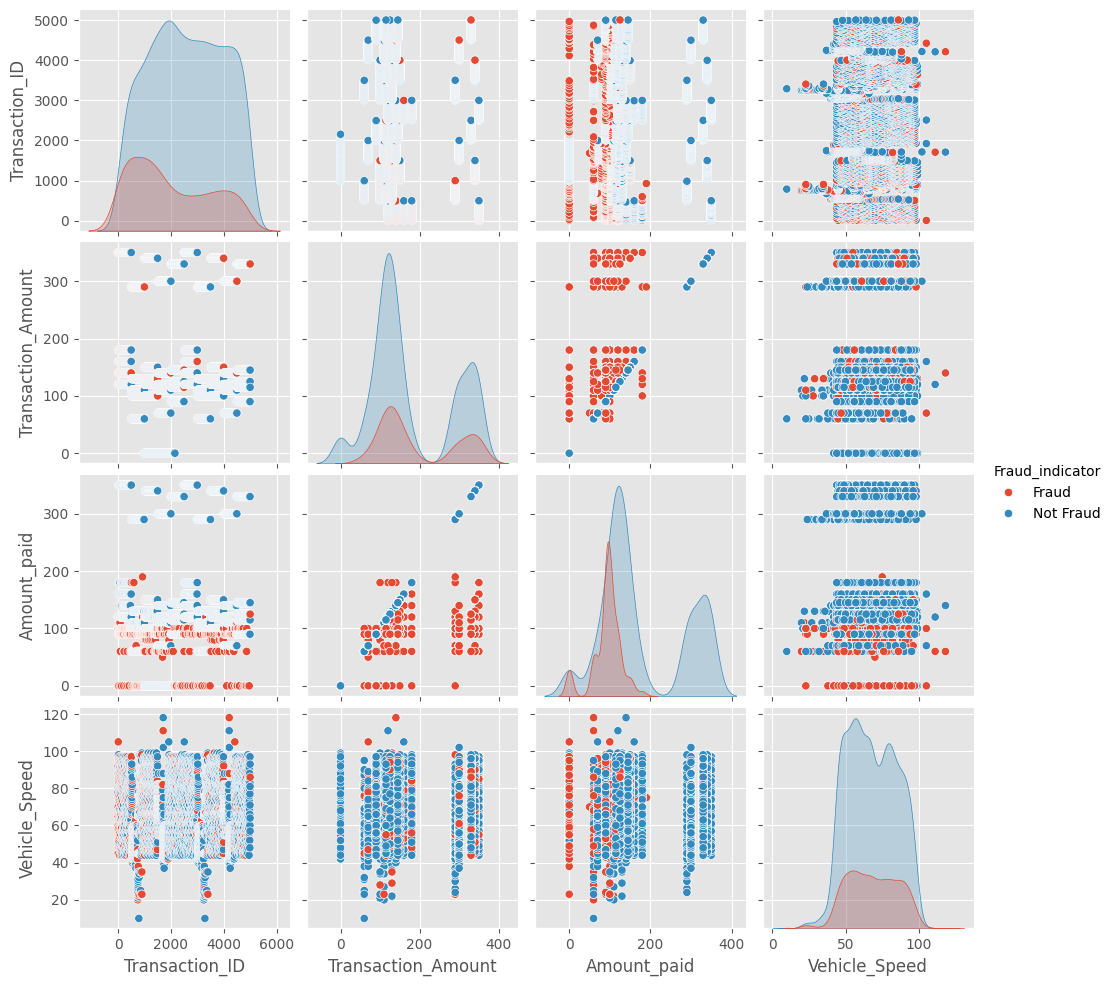

In [ ]:
# lets see the pairplot:
plt.style.use("ggplot")
sns.pairplot(data=df,hue="Fraud_indicator")

<Axes: >

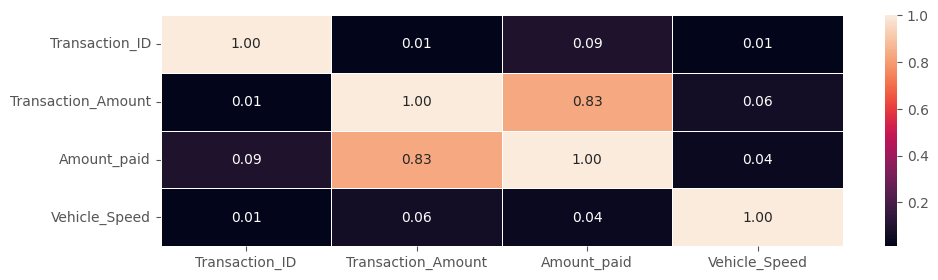

In [ ]:
# lets see the correlation between each input fetures:
plt.figure(figsize=(11,3))
sns.heatmap(data=df.select_dtypes([int,float]).corr(),annot=True,fmt=".2f",linewidth=0.6)

## Now after seeing correlation plot we seen that Tranaction amunt highly correlated with Amount paid...
## It may leads toward multi-collinearity issue so to avoid this issue we erquired doman knowledge to reduce one feature...we can use PCA to reduce correlation...

Here we have high correlation between Amount Paid and Transaction Amount

If we see the scatter plot we are getting that we have multiple outliers available in this dataset to reduce them we have to use Zscore method



<Axes: xlabel='Transaction_Amount', ylabel='Amount_paid'>

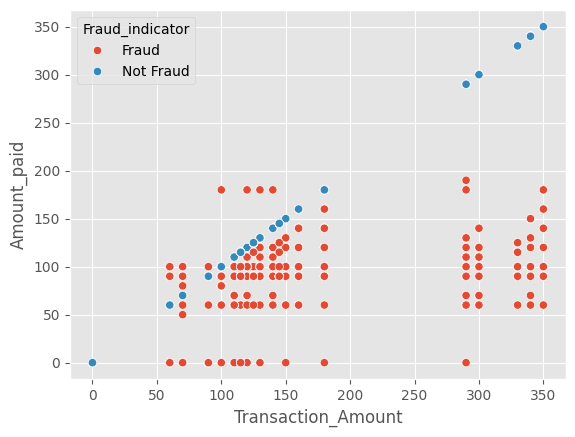

In [ ]:
print(f"Here we have high correlation between Amount Paid and Transaction Amount\n")
print(f"If we see the scatter plot we are getting that we have multiple outliers available in this dataset to reduce them we have to use Zscore method\n")
sns.scatterplot(data=df,x="Transaction_Amount",y="Amount_paid",hue="Fraud_indicator")

# Outliers handling and Selectin Fetaures we can see later After doing EValuation with different algorithms

In [ ]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,2023-01-06 11:20:00,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,2023-01-07 14:55:00,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
3,4,2023-01-09 02:05:00,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,2023-01-10 06:35:00,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
5,6,2023-01-11 10:00:00,Sedan,FTG-066-GHI-987,A-101,Regular,Medium,160,100,"13.059816123454882, 77.77068662374292",105,KA77KL0123,Fraud


In [ ]:
# lets divide the Timestamp columns to check the fraudulent:
df.insert(1,"Hour",df['Timestamp'].dt.hour)

In [ ]:
df.insert(2,"Month",df['Timestamp'].dt.month)
df.insert(3,"DayOfWeek",df['Timestamp'].dt.dayofweek)

In [ ]:
# now lets drop TimeStamp Columns:
df.drop(columns = ['Timestamp'],inplace=True)

In [ ]:
df.head()

,Transaction_ID,Hour,Month,DayOfWeek,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,11,1,4,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,14,1,5,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
3,4,2,1,0,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,6,1,1,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
5,6,10,1,2,Sedan,FTG-066-GHI-987,A-101,Regular,Medium,160,100,"13.059816123454882, 77.77068662374292",105,KA77KL0123,Fraud


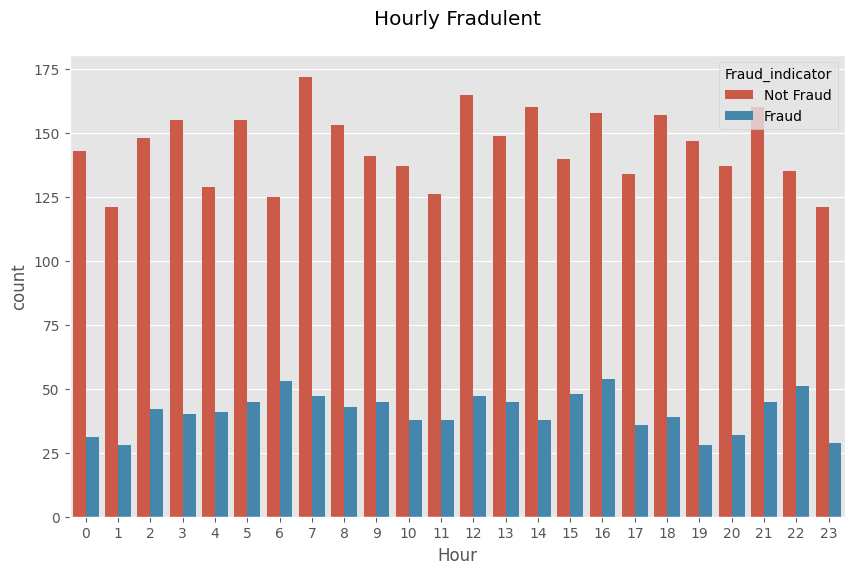

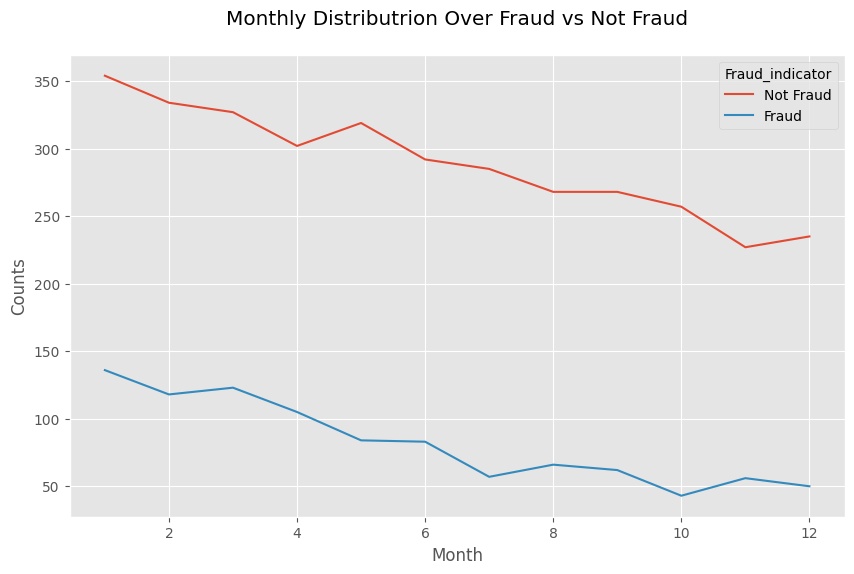

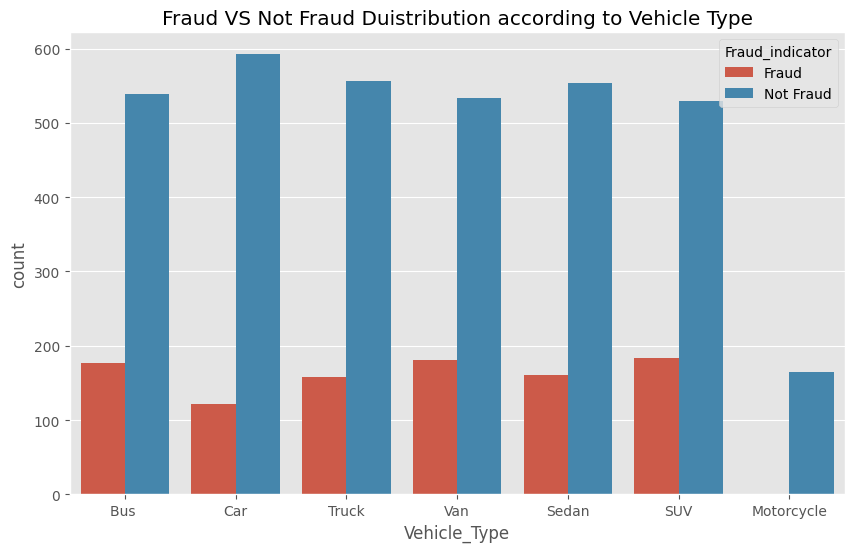

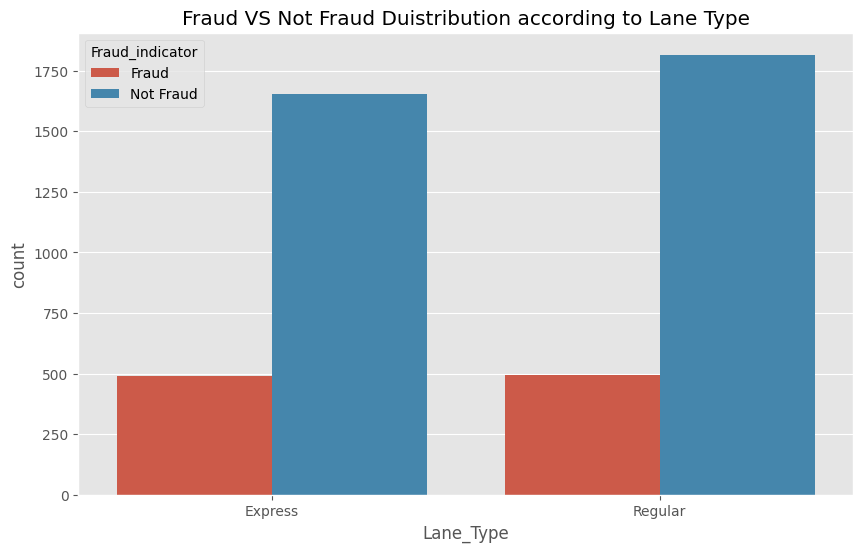

In [ ]:
# lets check the Hourly Frauduelnt:
plt.style.use("ggplot")
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="Hour",hue="Fraud_indicator")
plt.title("Hourly Fradulent\n")
plt.show()

# lets check the Fraudulent rate in each month:
plt.figure(figsize=(10,6))
Monthly_Fraudulent = df.groupby("Month")[['Fraud_indicator']].value_counts().reset_index(name="Counts")
sns.lineplot(data=Monthly_Fraudulent,x="Month",y="Counts",hue="Fraud_indicator")
plt.title("Monthly Distributrion Over Fraud vs Not Fraud\n")
plt.show()

# lets check the Fraud vs Not Fraud distribtion over Vehicle type
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="Vehicle_Type",hue="Fraud_indicator")
plt.title("Fraud VS Not Fraud Duistribution according to Vehicle Type")
plt.show()

# lets check the Fraud vs Not Fraud distribtion over Lane type
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="Lane_Type",hue="Fraud_indicator")
plt.title("Fraud VS Not Fraud Duistribution according to Lane Type")
plt.show()

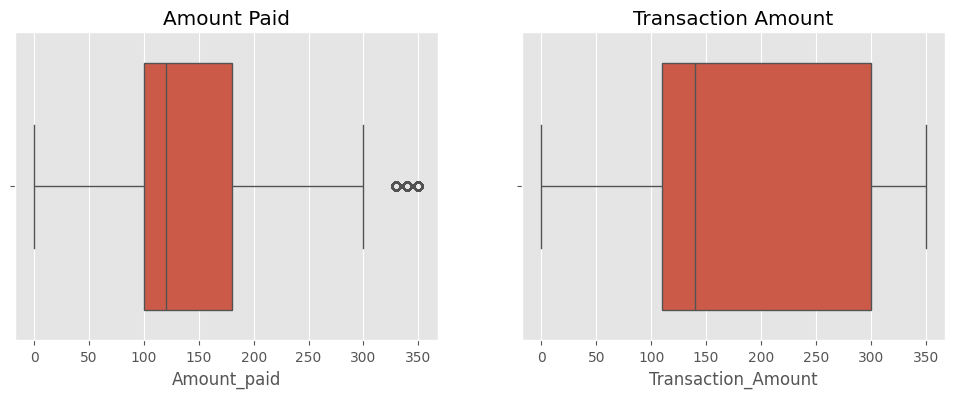

In [ ]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,4))
ax1.set_title("Amount Paid")
sns.boxplot(data=df,x='Amount_paid',ax=ax1)
ax2.set_title("Transaction Amount")
sns.boxplot(data=df,x='Transaction_Amount',ax=ax2)
plt.show()

## In Amount paid we have some Outliers and data is skwed towards left side so we have to use IQR Method to assign the values to outliers by Q3+1.5*IQR for beyong max range and Q1 - 1.5*IQR for below min range..

<Axes: title={'center': 'Fraudulent over Amount paid'}, xlabel='Amount_paid', ylabel='Count'>

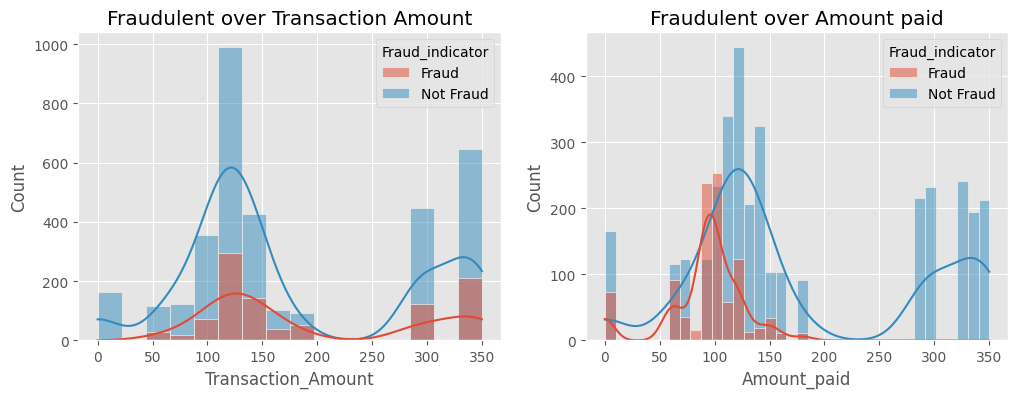

In [ ]:
# lets see the Fraudulent Rate over Transcation Aount and Amount paid:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,4))
ax1.set_title("Fraudulent over Transaction Amount")
sns.histplot(data=df,x="Transaction_Amount",hue="Fraud_indicator",ax=ax1,kde=True)
ax2.set_title("Fraudulent over Amount paid")
sns.histplot(data=df,x="Amount_paid",hue="Fraud_indicator",ax=ax2,kde=True)

### ***Conclusion:***
- from above plot we get that Amount paid has skewed data and it has outliers..
- So on that outliers point or on that amount above 280 there will be no frau done so we can trim them or we can do capping...with use of IQR method..

In [ ]:
for i in ['Amount_paid']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  # lets take the range...
  upper_range = Q3 + 1.5 * IQR
  lower_range = Q1 - 1.5 * IQR

  print("Upper limit AMount paid",upper_range)
  df[i] = np.where(df[i] > upper_range , upper_range,df[i])
  df[i] = np.where(df[i] < lower_range , lower_range,df[i])

Upper limit AMount paid 300.0


<Axes: xlabel='Transaction_Amount'>

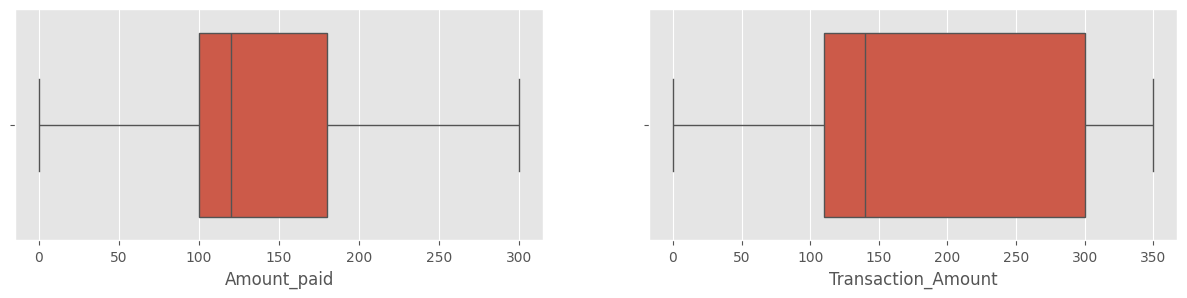

In [ ]:
# now lets check the outliers:
plt.figure(figsize=(15,3))
plt.subplot(121)
sns.boxplot(data=df,x="Amount_paid")
plt.subplot(122)
sns.boxplot(data=df,x="Transaction_Amount")

In [ ]:
# here lets fetch catgeorical columns :
cat_col = df.select_dtypes(object)
cat_col.columns

Index(['Vehicle_Type', 'FastagID', 'TollBoothID', 'Lane_Type',
       'Vehicle_Dimensions', 'Geographical_Location', 'Vehicle_Plate_Number',
       'Fraud_indicator'],
      dtype='object')

In [ ]:
for i in cat_col.columns:
  print(i,df[i].unique(),sep=": ")

Vehicle_Type: ['Bus ' 'Car' 'Truck' 'Van' 'Sedan' 'SUV' 'Motorcycle']
FastagID: ['FTG-001-ABC-121' 'FTG-002-XYZ-451' 'FTG-044-LMN-322' ...
 'FTG-447-PLN-109' 'FTG-458-VFR-876' 'FTG-459-WSX-543']
TollBoothID: ['A-101' 'B-102' 'C-103' 'D-106']
Lane_Type: ['Express' 'Regular']
Vehicle_Dimensions: ['Large' 'Small' 'Medium']
Geographical_Location: ['13.059816123454882, 77.77068662374292'
 '13.042660878688794, 77.47580097259879'
 '12.84197701525119, 77.67547528176169'
 '12.936687032945434, 77.53113977439017'
 '13.21331620748757, 77.55413526894684']
Vehicle_Plate_Number: ['KA11AB1234' 'KA66CD5678' 'KA11GH3456' ... 'KA33WX6789' 'KA35YZ0123'
 'KA37AB3456']
Fraud_indicator: ['Fraud' 'Not Fraud']


- Lets see the distribution of each categories...

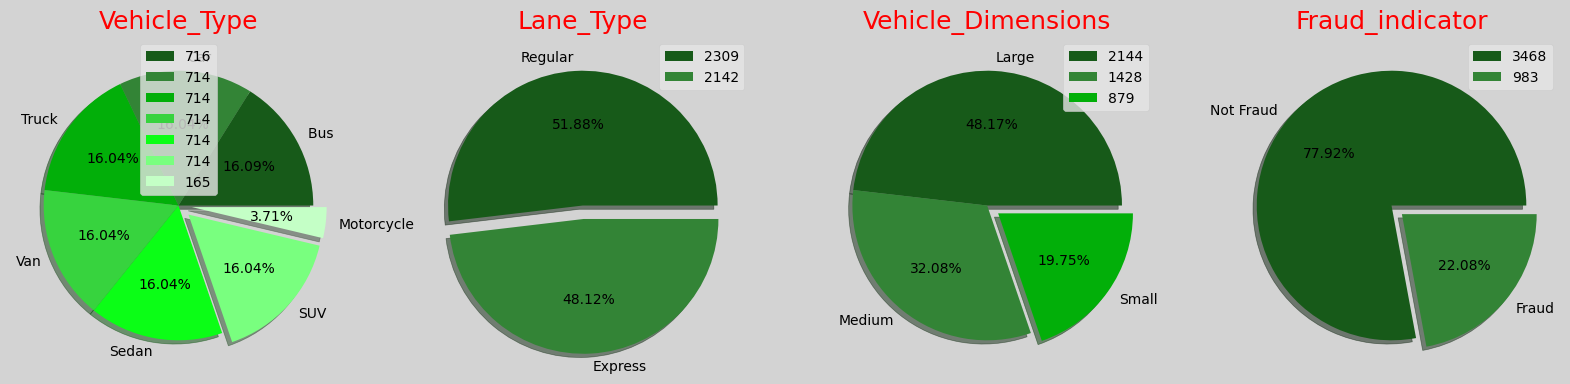

In [ ]:
fig,axs = plt.subplots(1,4,figsize=(20,6),facecolor="lightgray")
colors = [('#175A19','#338436',"#02AF09","#37D33E","#0BFE16","#79FF7F","#C4FFC6"),('#175A19','#338436'),('#175A19','#338436',"#02AF09"),('#175A19','#338436')]
explode = [(0,0,0,0,0,0.1,0.1),(0,0.1),(0,0,0.1),(0,0.1)]
for i,col in enumerate(cat_col.drop(columns=['FastagID','Geographical_Location','Vehicle_Plate_Number','TollBoothID']).columns):
  ax = axs[i]
  res = cat_col[col].value_counts()
  ax.pie(res,autopct="%.2f%%",labels=res.index,colors=colors[i],explode=explode[i],shadow=True)
  ax.legend(res.values)
  ax.set_title(col,color="red",size=18)

In [ ]:
!pip install scikit-learn==1.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 36.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
X = df.drop(columns=['Fraud_indicator','Vehicle_Plate_Number','Transaction_ID'])
y = df['Fraud_indicator']

In [ ]:
# Importinig Libraries:

# for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


# for preprocessing
from sklearn.preprocessing import LabelEncoder,RobustScaler,OneHotEncoder,OrdinalEncoder

# for avoiding overfitting issue
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# for pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# For fine tuning
from sklearn.model_selection import GridSearchCV

# evaluation
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
y_train.value_counts(normalize=True)*100

Fraud_indicator
Not Fraud    77.920911
Fraud        22.079089
Name: proportion, dtype: float64

In [ ]:
x_train[:2]

,Hour,Month,DayOfWeek,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed
3442,15,3,5,Van,FTG-795-EDC-765,B-102,Express,Medium,110,110.0,"13.042660878688794, 77.47580097259879",57
3978,21,10,4,Car,FTG-456-YUI-968,A-101,Express,Small,100,80.0,"12.84197701525119, 77.67547528176169",45


In [ ]:
transform = ColumnTransformer(transformers=[
    ("tnf1",OneHotEncoder(drop="first"),['Vehicle_Type','FastagID','TollBoothID','Lane_Type','Vehicle_Dimensions','Geographical_Location']),
    ("tnf2",RobustScaler(),['Transaction_Amount','Amount_paid'])
],remainder="passthrough")

# *fit:*
- *it used to calculate the Parameters*
- *Now we are using the feature scaling technique and so fit method calcualtes the median and IQR value of each feature..*


# *Transform:*
- *it is used apply the calcualted paramtere over each data..*
- *So transform supply the formula of mmin max scaler over each value of datatset and we get the scaled value... according to IQR and median range*


In [ ]:
x_train_np = transform.fit_transform(x_train)
x_test_np = transform.transform(x_test)

In [ ]:
encode = LabelEncoder()

y_train_np = encode.fit_transform(y_train)
y_test_np = encode.transform(y_test)

In [ ]:
encode.classes_

array(['Fraud', 'Not Fraud'], dtype=object)

In [ ]:
!pip install --upgrade scikit-learn imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 22.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.0
    Uninstalling scikit-learn-1.4.0:
      Successfully uninstalled scikit-learn-1.4.0
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


###***SMOTE:***
- Synthetic Minority Over Sampling Technique
- Basically used to increase number of insatnces of Minority class.
- SMOTE does not duplicates the existing instances instead it geneartes new instances by considering relation with existing instances:
- Here no chance of Raising the Dupilcates or False Positives:

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
st = SMOTE()
st

SMOTE()

In [ ]:
x_resampled,y_resampled = st.fit_resample(x_train_np,y_train_np)

In [ ]:
x_resampled.toarray()

array([[ 0.        ,  0.        ,  0.        , ...,  3.        ,
         5.        , 57.        ],
       [ 1.        ,  0.        ,  0.        , ..., 10.        ,
         4.        , 45.        ],
       [ 0.        ,  0.        ,  0.        , ..., 11.        ,
         5.        , 68.        ],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  4.23140498,
         5.38429751, 56.23140498],
       [ 0.        ,  0.        ,  1.        , ...,  4.        ,
         5.        , 73.        ],
       [ 0.        ,  0.        ,  0.        , ...,  3.        ,
         1.06241508, 56.29172328]])

In [ ]:
y_resampled[y_resampled == 1].shape,y_resampled[y_resampled == 0].shape # here we are getting the data in porportion:

((2601,), (2601,))

In [ ]:
# noe agai split the data :
X_train,X_test,Y_train,Y_test = train_test_split(x_resampled,y_resampled,test_size=0.3,random_state=42)

In [ ]:
def Model_Eval(X_train,Y_train,X_test,Y_test):

  classifiers =[
      LogisticRegression(),
      RandomForestClassifier(),
      BernoulliNB(),
      DecisionTreeClassifier(),
      GradientBoostingClassifier(learning_rate=0.1,n_estimators=500,max_depth=5),
      SVC(kernel='linear'),
      KNeighborsClassifier(n_neighbors=10)

  ]

  class_names = [
      "LogisticRgerssion",
      "RandomforestClf",
      "Benoulli",
      "DecisionTreeClf",
      "GradientBoost",
      "SVC",
      "KNNClf"
  ]

  Metrics = pd.DataFrame(columns=['Accuracy','Recall','Precision','f1'])

  for i,clf in enumerate(classifiers):

    clf.fit(X_train,Y_train)

    Y_pred = clf.predict(X_test)

    # performance of metrics:

    Accuracy = accuracy_score(Y_test,Y_pred)*100
    Precision = precision_score(Y_test,Y_pred)*100
    Recall = recall_score(Y_test,Y_pred)*100
    f1 = f1_score(Y_test,Y_pred)*100

    Metrics.loc[class_names[i],"Accuracy"] = Accuracy
    Metrics.loc[class_names[i],"Recall"] = Recall
    Metrics.loc[class_names[i],"Precision"] = Precision
    Metrics.loc[class_names[i],"f1"] = f1

  Metrics = Metrics.sort_values(by="Accuracy",ascending=False)

  return Metrics
Metrics = Model_Eval(X_train,Y_train,X_test,Y_test)

In [ ]:
Metrics

,Accuracy,Recall,Precision,f1
SVC,99.295324,100.0,98.61809,99.304238
GradientBoost,99.167201,100.0,98.370927,99.178774
DecisionTreeClf,98.462524,100.0,97.033375,98.494354
RandomforestClf,98.27034,100.0,96.674877,98.30933
LogisticRgerssion,96.796925,100.0,94.011976,96.91358
Benoulli,93.209481,94.140127,92.490613,93.308081
KNNClf,67.328635,42.292994,85.347044,56.558773


- Now lets chcek the performance of model over XGBClassifier by applying GridSearch on it...

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    "learning_rate":[0.1,0.01,0.001],
    "n_estimators":[100,300,500],
    "max_depth":[3,5,7]
}

grid = GridSearchCV(estimator=XGBClassifier(),param_grid=params,scoring="accuracy",cv=10)

grid.fit(X_train,Y_train)

Y_pred = grid.predict(X_test)

print("Accuracy",accuracy_score(Y_test,Y_pred)*100)
print("Classifiaction Report",classification_report(Y_test,Y_pred))
print("Best Params",grid.best_params_)

Accuracy 99.50221238938053
Classifiaction Report               precision    recall  f1-score   support

           0       1.00      0.99      0.99       887
           1       0.99      1.00      1.00       921

    accuracy                           1.00      1808
   macro avg       1.00      0.99      1.00      1808
weighted avg       1.00      1.00      1.00      1808

Best Params {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


## As we getting the better accuracy over 15 columns lets use Top 5 columns from them and see the accuracy...

## As we have catgeorical Input and Catgeorical Output so we can use Chi sqaure test or anova --> score function will be f_classif...

## as far as i know chi square test wont takes negtaive values so as we do Robust scaler so there negative values will get generated so we have to use f_classif and further we have to check the accuracy and then we build the pipeline for it...

In [ ]:
X[:2]

,Hour,Month,DayOfWeek,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed
0,11,1,4,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120.0,"13.059816123454882, 77.77068662374292",65
1,14,1,5,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100.0,"13.059816123454882, 77.77068662374292",78


In [ ]:
y[:2]

0    Fraud
1    Fraud
Name: Fraud_indicator, dtype: object

## As we use OneHot Encoder so it is generating so many collmns and it may elads towards multicollineairty issue..
## To avoid this issue we are going to use LabelEncoder and next thing is that..After label encoder we have to drop one column from transcation amount and amount paid as per score we get beause it has 0.87 correlation and makes difficult for output data for prediction...

### ***Label Encoding:***

In [ ]:
for i in cat_col.drop(columns=['Fraud_indicator','Vehicle_Plate_Number']).columns:
  X[i] = encode.fit_transform(X[i])

In [ ]:
X[:2]

,Hour,Month,DayOfWeek,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed
0,11,1,4,0,2,0,0,0,350,120.0,3,65
1,14,1,5,1,9,1,1,2,120,100.0,3,78


In [ ]:
y = encode.fit_transform(y)

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
encode.classes_

array(['Fraud', 'Not Fraud'], dtype=object)

### ***Data Splitting:***

In [ ]:
x3_train,x3_test,y3_train,y3_test = train_test_split(X,y,test_size=0.2,random_state=42)

### ***Scale the data:***

In [ ]:
rb = RobustScaler()

In [ ]:
x3_train[["Transaction_Amount",'Amount_paid','Vehicle_Speed']] = rb.fit_transform(x3_train[["Transaction_Amount",'Amount_paid','Vehicle_Speed']])
x3_test[["Transaction_Amount",'Amount_paid','Vehicle_Speed']] = rb.transform(x3_test[["Transaction_Amount",'Amount_paid','Vehicle_Speed']])

In [ ]:
x3_train[:2]

,Hour,Month,DayOfWeek,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed
4806,3,3,2,5,1748,2,0,0,1.000000,2.25,4,-0.555556
4783,8,2,2,1,1646,0,1,2,-0.263158,-1.50,4,1.037037


### ***Data Balancing:***
- ***smote:***

In [ ]:
A_resampled,b_resampled = st.fit_resample(x3_train,y3_train)

In [ ]:
b_resampled[b_resampled == 0].shape,b_resampled[b_resampled == 1].shape

((2769,), (2769,))

In [ ]:
x3_train,x3_test,y3_train,y3_test = train_test_split(A_resampled,b_resampled,test_size=0.2,random_state=42)

In [ ]:
x3_train[:2]

,Hour,Month,DayOfWeek,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed
3929,18,2,1,3,2486,0,1,1,0.065065,-0.286414,3,0.414479
1876,22,12,0,3,3898,1,0,0,-0.052632,0.125000,2,-0.333333


### Lets use Featuer selection Techniques...
- As we have cat input and cat output so we can use chi square...but due to some negative values which are nt allwed inchir sqaure so i am using here fclassif from analysis over variance..

In [ ]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [ ]:
sel = SelectKBest(f_classif,k=5)
sel

SelectKBest(k=5)

In [ ]:
sel.fit(x3_train,y3_train)

SelectKBest(k=5)

In [ ]:
scores =  sel.scores_
scores

array([3.44096690e-01, 1.36379313e+02, 3.29278336e+01, 4.31644489e-01,
       3.38227732e+00, 1.42308293e+02, 1.60182823e+02, 2.77079711e+02,
       1.85182035e+01, 1.41085571e+03, 7.05451812e+01, 2.84289377e-02])

In [ ]:
columns = sel.get_support()
columns

array([False,  True, False, False, False,  True,  True,  True, False,
        True, False, False])

In [ ]:
x3_train = x3_train.iloc[:,columns]
x3_train[:2]

,Month,TollBoothID,Lane_Type,Vehicle_Dimensions,Amount_paid
3929,7,0,0,1,-0.373541
1876,12,1,0,0,0.125000


In [ ]:
x3_test = x3_test.iloc[:,columns]

In [ ]:
XGBC = XGBClassifier(learning_rate=0.1,max_depth=5,n_estimators=300)
XGBC

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
XGBC.fit(x3_train,y3_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y3_pred = XGBC.predict(x3_test)

In [ ]:
accuracy_score(y3_test,y3_pred)*100

95.84837545126354

In [ ]:
print(classification_report(y3_test,y3_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       541
           1       0.94      0.98      0.96       567

    accuracy                           0.96      1108
   macro avg       0.96      0.96      0.96      1108
weighted avg       0.96      0.96      0.96      1108



In [ ]:
metrics = Model_Eval(x3_train,y3_train,x3_test,y3_test)

In [ ]:
metrics

,Accuracy,Recall,Precision,f1
GradientBoost,96.389892,97.530864,95.509499,96.509599
RandomforestClf,95.938628,97.707231,94.539249,96.097138
DecisionTreeClf,95.848375,96.296296,95.621716,95.957821
KNNClf,91.155235,93.82716,89.411765,91.566265
SVC,88.086643,89.241623,87.694974,88.461538
LogisticRgerssion,87.99639,87.654321,88.75,88.198758
Benoulli,75.812274,67.724868,81.876333,74.131274


## i am getting better accuracy after reducing columns and also it will ot leads towards multi-collinearity...
## here we are going to build pipeline over it...

In [ ]:
# we required new data on now....
ndf = df[x3_train.columns]
ndf[:2]

,Month,TollBoothID,Lane_Type,Vehicle_Dimensions,Amount_paid
0,1,A-101,Express,Large,120.0
1,1,B-102,Regular,Small,100.0


In [ ]:
ndf.insert(5,"Fraud_indicator",df['Fraud_indicator'].values)

In [ ]:
ndf.to_csv("New_Fastag_Data2.csv")

In [ ]:
ndf.shape

(4451, 6)

In [ ]:
X = ndf.drop(columns=['Fraud_indicator'])
X.shape

(4451, 5)

In [ ]:
y.shape

(4451,)

In [ ]:
x4_train,x4_test,y4_train,y4_test = train_test_split(X,y,stratify=y,test_size=0.2)
y4_train[y4_train == 0].shape,y4_train[y4_train == 1].shape

((786,), (2774,))

In [ ]:
x4_train[:2]

,Month,TollBoothID,Lane_Type,Vehicle_Dimensions,Amount_paid
3073,1,B-102,Regular,Large,130.0
82,3,A-101,Express,Medium,60.0


## Encode the data and apply smote on it...

In [ ]:
for i in x4_train.columns:
  if x4_train[i].dtypes == 'O':
    x4_train[i] = encode.fit_transform(x4_train[i])

In [ ]:
for i in x4_test.columns:
  if x4_test[i].dtypes == 'O':
    x4_test[i] = encode.fit_transform(x4_test[i])

In [ ]:
x4_train[:2]

,Month,TollBoothID,Lane_Type,Vehicle_Dimensions,Amount_paid
3635,1,0,1,2,100.0
4914,3,1,0,0,145.0


In [ ]:
X_resampled,y_resampled = st.fit_resample(x4_train,y4_train)

In [ ]:
x5_train,x5_test,y5_train,y5_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [ ]:
y5_train[y5_train == 0].shape,y5_train[y5_train == 1].shape

((2232,), (2206,))

In [ ]:
x5_train[:2]

,Month,TollBoothID,Lane_Type,Vehicle_Dimensions,Amount_paid
2440,2,2,0,0,300.0
3085,11,2,1,0,290.0


In [ ]:
trf1 = ColumnTransformer(transformers=[
    ("tnf2",RobustScaler(),['Amount_paid'])
],remainder="passthrough")

In [ ]:
trf2 = XGBClassifier(learning_rate=0.1,max_depth=5,n_estimators=300)
trf2

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# make a pipeline..
Fastag_XGBC_pipe = make_pipeline(trf1,trf2)

In [ ]:
# for chceking the how it will gives robust scaled values ten first we have to set config
from sklearn import set_config
set_config(display="diagram")

In [ ]:
Fastag_XGBC_pipe.named_steps

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('tnf2', RobustScaler(), ['Amount_paid'])]),
 'xgbclassifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=500, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...)}

In [ ]:
Fastag_XGBC_pipe.fit(x5_train,y5_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf2', RobustScaler(),
                                                  ['Amount_paid'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_met...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
Fastag_XGBC_pipe.score(x5_train,y5_train)*100

95.58359621451105

In [ ]:
y5_pred = Fastag_XGBC_pipe.predict(x5_test)

In [ ]:
print(classification_report(y5_test,y5_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       542
           1       0.95      0.95      0.95       568

    accuracy                           0.95      1110
   macro avg       0.95      0.95      0.95      1110
weighted avg       0.95      0.95      0.95      1110



<Axes: >

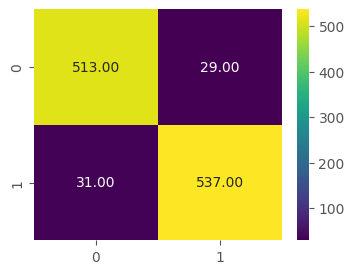

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(data=confusion_matrix(y5_test,y5_pred),annot=True,fmt=".2f",cmap="viridis")

### ***Dump the model:***

In [ ]:
import pickle

In [ ]:
pickle.dump(encode,open("updated_encode_fastag_data_3.pkl","wb"))
pickle.dump(Fastag_XGBC_pipe,open("fastag_xgb_pipe_3.pkl","wb"))

In [ ]:
A_resampled[:2]

,Hour,Month,DayOfWeek,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed
0,11,1,4,0,2,0,0,0,350,120.0,3,65
1,14,1,5,1,9,1,1,2,120,100.0,3,78


In [ ]:
A_resampled.insert(12,"Fraud_indicator",b_resampled)

In [ ]:
A_resampled.to_csv("Fastag_OG_Data2.csv")